In [108]:
import pandas as pd
import numpy as np

data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [110]:
data.set_index('Person ID', inplace=True)

In [111]:
onehot_gender = pd.get_dummies(data['Gender'])
# onehot_gender
data = pd.concat([data, onehot_gender], axis = 1)

onehot_bmi = pd.get_dummies(data['BMI Category'])
data = pd.concat([data, onehot_bmi], axis = 1)

# onehot_target = pd.get_dummies(data['Sleep Disorder'])
# data = pd.concat([data, onehot_target], axis=1)

In [112]:
data.drop(['Gender', 'BMI Category'], axis=1, inplace=True)

In [113]:
data

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Female,Male,Normal,Normal Weight,Obese,Overweight
Person ID,,,,,,,,,,,,,,,,
1,27,Software Engineer,6.1,6,42,6,126/83,77,4200,None,0,1,0,0,0,1
2,28,Doctor,6.2,6,60,8,125/80,75,10000,None,0,1,1,0,0,0
3,28,Doctor,6.2,6,60,8,125/80,75,10000,None,0,1,1,0,0,0
4,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,0,1,0,0,1,0
5,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea,1,0,0,0,0,1
371,59,Nurse,8.0,9,75,3,140/95,68,7000,Sleep Apnea,1,0,0,0,0,1
372,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Apnea,1,0,0,0,0,1


In [126]:
data['Blood Pressure']

Person ID
1         126
2         125
3         125
4         140
5         140
        ...  
370       140
371       140
372       140
373       140
374    140/95
Name: Blood Pressure, Length: 374, dtype: object

In [128]:
for i in range(1, len(data['Blood Pressure'])+1) :
    data.loc[i, 'Blood Pressure'] = data['Blood Pressure'][i].split('/')[0]
    
data['Blood Pressure']

Person ID
1      126
2      125
3      125
4      140
5      140
      ... 
370    140
371    140
372    140
373    140
374    140
Name: Blood Pressure, Length: 374, dtype: object

In [129]:
sleep_train = data[['Female', 'Male', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Normal', 'Normal Weight', 'Obese', 'Overweight', 'Blood Pressure', 'Heart Rate', 'Daily Steps']].to_numpy()
# sleep_train

sleep_target = data[['Sleep Disorder']].to_numpy()
# sleep_target

In [130]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(sleep_train, sleep_target, test_size=0.35, random_state=42)

In [124]:
train_input.shape

(243, 14)

In [125]:
train_target.shape

(243, 1)

In [61]:
test_scaled.shape

(131, 14)

In [131]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [132]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [29]:
train_scaled[:3]

array([[-1.04381619,  1.04381619,  0.17265472, -1.08260812, -1.15283871,
        -0.73085692,  0.96057491, -1.02899151, -0.24618298, -0.14797909,
         1.20670641,  0.        ,  0.47516158, -0.55224501],
       [-1.04381619,  1.04381619,  0.17265472, -1.08260812, -1.15283871,
        -0.73085692,  0.96057491, -1.02899151, -0.24618298, -0.14797909,
         1.20670641,  0.        ,  0.47516158, -0.55224501],
       [-1.04381619,  1.04381619, -0.53653825, -0.06325453,  0.55056413,
        -0.00995531, -0.1766808 ,  0.97182532, -0.24618298, -0.14797909,
        -0.82870199,  0.        , -0.50853707,  0.69980845]])

In [133]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [134]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9259259259259259
0.8778625954198473


In [135]:
lr2 = LogisticRegression(C=20, max_iter=1000)
lr2.fit(train_scaled, train_target)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=20, max_iter=1000)

In [136]:
print(lr2.score(train_scaled, train_target))
print(lr2.score(test_scaled, test_target))

0.9259259259259259
0.8931297709923665


In [137]:
lr3 = LogisticRegression()
lr3.fit(train_scaled, train_target)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [138]:
print(lr3.score(train_scaled, train_target))
print(lr3.score(test_scaled, test_target))

0.9259259259259259
0.8778625954198473


In [139]:
lr4 = LogisticRegression()
lr4.fit(train_scaled, train_target)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [140]:
print(lr4.score(train_scaled, train_target))
print(lr4.score(test_scaled, test_target))

0.9259259259259259
0.8778625954198473


In [141]:
lr4.predict(test_scaled[15:20])

array(['Sleep Apnea', 'None', 'Insomnia', 'None', 'None'], dtype=object)

In [142]:
proba = lr4.predict_proba(test_scaled[15:20])
print(lr4.classes_)
print(np.round(proba, decimals=3))

['Insomnia' 'None' 'Sleep Apnea']
[[0.034 0.047 0.919]
 [0.235 0.712 0.053]
 [0.925 0.06  0.015]
 [0.072 0.918 0.01 ]
 [0.001 0.998 0.001]]


In [78]:
train_input.shape

(243, 14)

In [80]:
train_target.shape

(243, 1)

In [143]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(sleep_train, sleep_target, test_size=0.35, random_state=42)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(sleep_train, sleep_target, random_state=42)

In [159]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

np.mean(scores['train_score']), np.mean(scores['test_score'])

(0.9423843510441449, 0.9054421768707483)

In [146]:
scores

{'fit_time': array([0.20307684, 0.23431969, 0.21869898, 0.21869898, 0.23431969]),
 'score_time': array([0.03124261, 0.01562095, 0.01562047, 0.01562047, 0.01562095]),
 'test_score': array([0.83673469, 0.93877551, 0.91836735, 0.91666667, 0.91666667]),
 'train_score': array([0.95876289, 0.93298969, 0.93298969, 0.94358974, 0.94358974])}

In [147]:
rf2 = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf2, X_train, y_train, return_train_score=True, n_jobs=-1)

np.mean(scores['train_score']), np.mean(scores['test_score'])

(0.9339285714285713, 0.9035714285714287)

In [148]:
scores

{'fit_time': array([0.17497611, 0.17497611, 0.17497611, 0.22945023, 0.21382833]),
 'score_time': array([0.01562047, 0.01562047, 0.01562047, 0.01562119, 0.0156219 ]),
 'test_score': array([0.85714286, 0.875     , 0.94642857, 0.92857143, 0.91071429]),
 'train_score': array([0.9375    , 0.94642857, 0.91964286, 0.92857143, 0.9375    ])}

In [160]:
rf.fit(train_input, train_target)
print(rf.score(train_input, train_target))
print(rf.score(test_input, test_target))

0.9382716049382716
0.8473282442748091


C:\Users\user\AppData\Local\Temp\ipykernel_20252\3322367635.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_input, train_target)


In [157]:
rf2.fit(X_train, y_train)
print(rf2.score(X_train, y_train))
print(rf2.score(X_test, y_test))

0.9321428571428572
0.8936170212765957


C:\Users\user\AppData\Local\Temp\ipykernel_20252\3582229650.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(X_train, y_train)


C:\Users\user\AppData\Local\Temp\ipykernel_20252\954336732.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

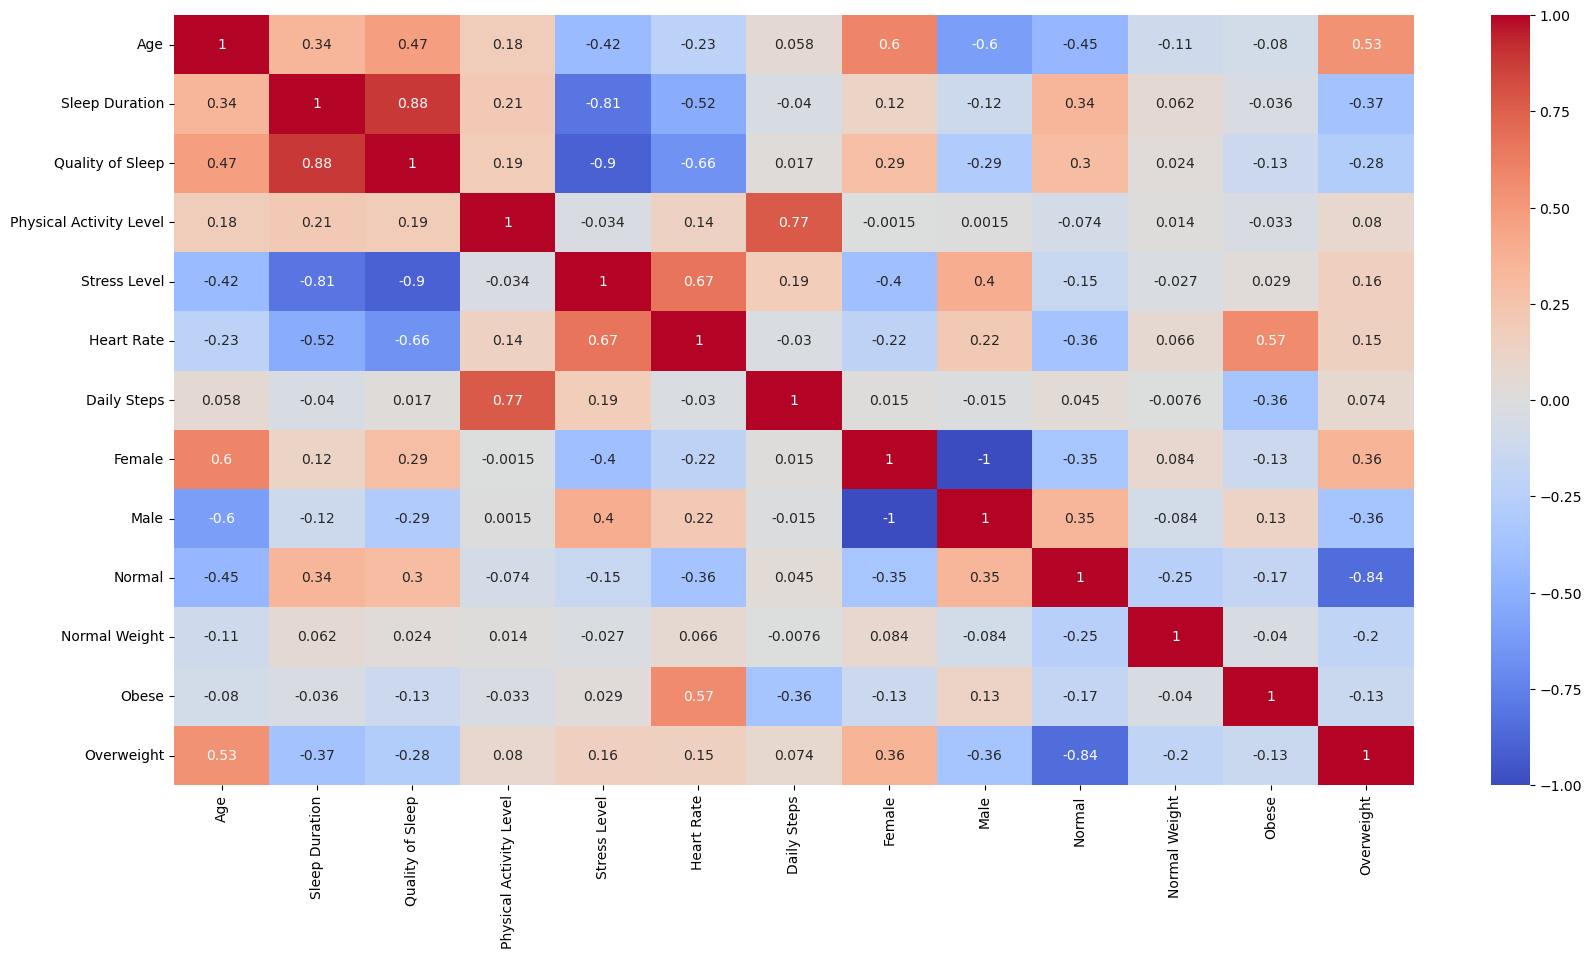

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(20,10)) 
sns.heatmap(corr, annot=True, cmap='coolwarm') # 상관관계 확인

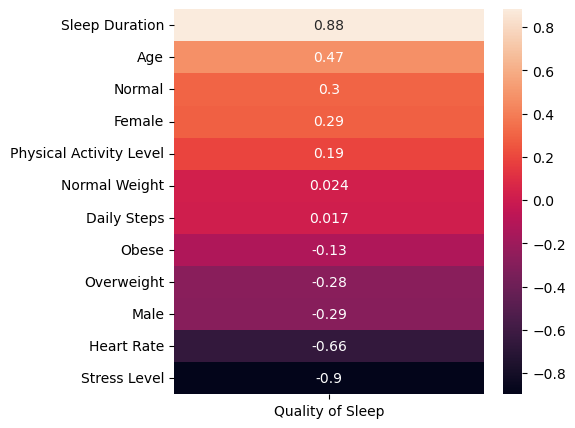

In [153]:
plt.figure(figsize=(5,5))
sns.heatmap(corr['Quality of Sleep'].drop('Quality of Sleep').sort_values(ascending=False).to_frame(),annot=True)
plt.show()